# Main Library

In [1]:
# Reading Images
import numpy as np
import os, cv2
import re, random
import matplotlib.pyplot as plt
import seaborn as sns

# Data Processing
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.utils import to_categorical
from keras.preprocessing.image import img_to_array

# Building Model
import tensorflow.keras as k
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import EfficientNetB7, EfficientNetV2M, ResNet50, MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-06-22 00:07:40.819178: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-22 00:07:40.819312: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-22 00:07:40.989190: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Loading Images

In [2]:
path = r'/kaggle/input/fruit-and-vegetable-disease-healthy-vs-rotten/Fruit And Vegetable Diseases Dataset'
columns = ['Apple__Healthy', 'Apple__Rotten', 'Banana__Healthy', 'Banana__Rotten',
           'Bellpepper__Healthy', 'Bellpepper__Rotten']

class_labels = ['Apple Healthy', 'Apple Rotten', 'Banana Healthy', 'Banana Rotten',
           'Bellpepper Healthy', 'Bellpepper Rotten']



images = []
labels = []

count = 0
for folder in columns:
    print('Loading --> ', folder)
    for img in os.listdir(path + '/' + folder):
        image = cv2.imread(path + '/' + folder + '/' + img)
        image = cv2.resize(image, (128, 128))
        images.append(image)
        labels.append(count)
    count += 1
    
print(len(images)), print(len(labels))

Loading -->  Apple__Healthy
Loading -->  Apple__Rotten


libpng warning: iCCP: known incorrect sRGB profile


Loading -->  Banana__Healthy
Loading -->  Banana__Rotten
Loading -->  Bellpepper__Healthy
Loading -->  Bellpepper__Rotten
11370
11370


(None, None)

In [3]:
data = np.array(images).astype('float32')
data = data / 255.0

labels = np.array(labels)

print(data.shape)

(11370, 128, 128, 3)


# Prepare Labels & Shuffle Data

In [4]:
data, labels = shuffle(data, labels)

labels = to_categorical(labels, len(columns))
labels[:5]

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])

# Show Random Images

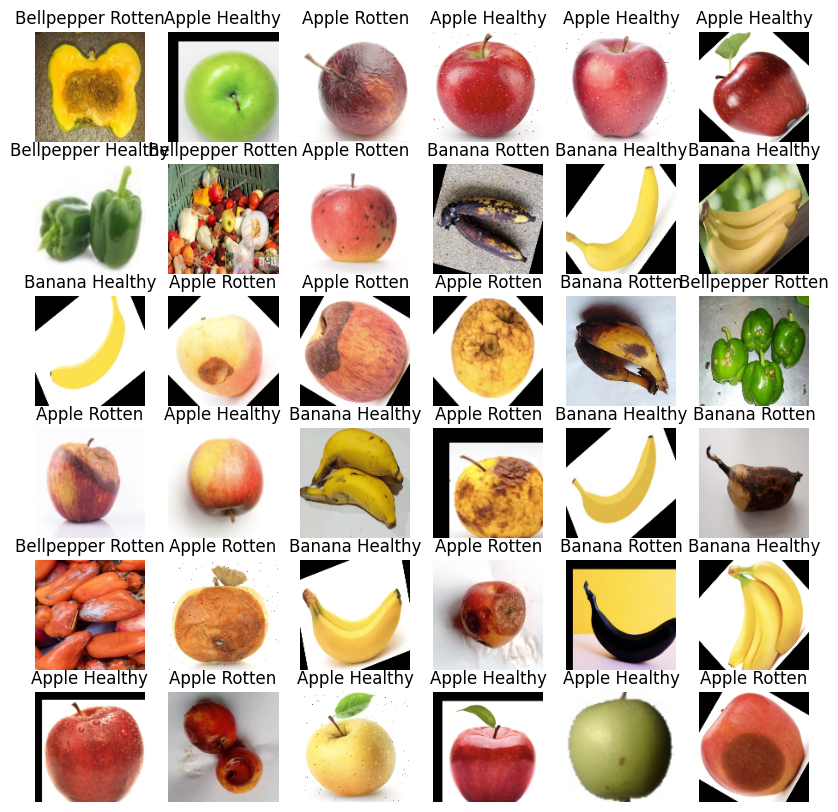

In [5]:
plt.figure(figsize=(10, 10))

for i,j in enumerate(list(np.random.randint(0, len(data), 36))):
    plt.subplot(6, 6, i+1)
    image = cv2.cvtColor(data[j], cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis("off")
    plt.title(class_labels[labels[j].argmax()])

# Splitting Data

In [6]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, train_size=0.8, random_state=42)

# Building Deep Learning Model From Scratch

In [7]:
model = Sequential()

model.add(Conv2D(filters=9, kernel_size=(5, 5), padding='same', input_shape=(128, 128, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((3, 3)))

model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(filters=128, kernel_size=(4, 4), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))

model.add(Dense(6, activation="softmax"))
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 9)    │           684 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128, 128, 9)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 42, 42, 9)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 42, 42, 64)     │        14,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 42, 42, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 21, 21, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,638,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,966,066 (7.50 MB)

 Trainable params: 1,966,066 (7.50 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam', loss=k.losses.CategoricalCrossentropy(), metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=128)

Epoch 1/10
 3/72 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.1784 - loss: 1.7672 

I0000 00:00:1719015066.432108     117 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1719015066.451766     117 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.3899 - loss: 1.4051

W0000 00:00:1719015073.273628     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1719015075.096382     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


72/72 ━━━━━━━━━━━━━━━━━━━━ 23s 159ms/step - accuracy: 0.3918 - loss: 1.4015 - val_accuracy: 0.7744 - val_loss: 0.6227
Epoch 2/10
 3/72 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7535 - loss: 0.6865

W0000 00:00:1719015077.779801     117 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.7673 - loss: 0.6593 - val_accuracy: 0.8083 - val_loss: 0.5309
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.8245 - loss: 0.4907 - val_accuracy: 0.8237 - val_loss: 0.4844
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.8636 - loss: 0.3607 - val_accuracy: 0.8843 - val_loss: 0.3597
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.8863 - loss: 0.3028 - val_accuracy: 0.8742 - val_loss: 0.3407
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.8775 - loss: 0.3480 - val_accuracy: 0.8839 - val_loss: 0.3000
Epoch 7/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9145 - loss: 0.2345 - val_accuracy: 0.8681 - val_loss: 0.4267
Epoch 8/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9346 - loss: 0.1963 - val_accuracy: 0.8835 - val_loss: 0.3608
Epoch 9/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9225 - loss: 0.2162 - val_accuracy: 0.9200 - val_loss: 0.

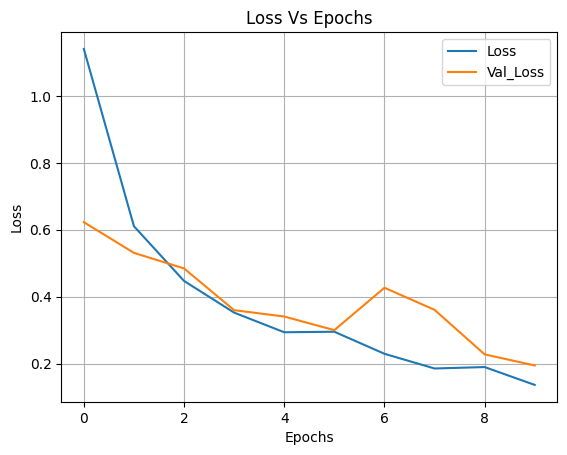

In [9]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Val_Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.title("Loss Vs Epochs")

plt.legend()
plt.grid()

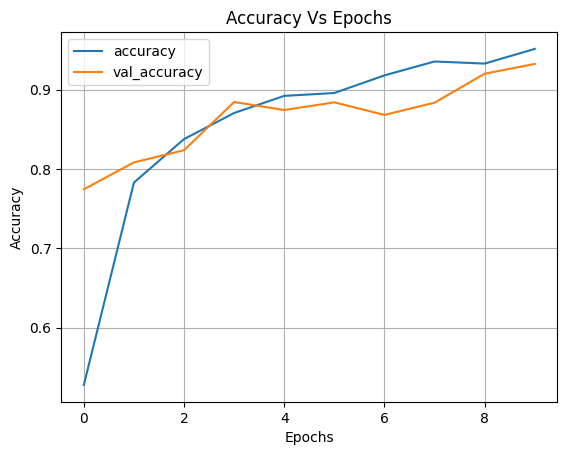

In [10]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.title("Accuracy Vs Epochs")

plt.legend()
plt.grid()

# Building Pre-Training Model

## EfficientNetV2M

In [11]:
model_B7 = k.applications.efficientnet_v2.EfficientNetV2M(weights="imagenet", include_top=False, input_shape=(128, 128, 3))

214201816/214201816 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [12]:
model = k.models.Sequential()
model.add(model_B7)
model.add(k.layers.Flatten())
# model.add(k.layers.BatchNormalization())
model.add(k.layers.Dense(512, activation="relu"))
model.add(k.layers.Dropout(0.5))
# model.add(k.layers.BatchNormalization())
model.add(k.layers.Dense(64, activation="relu"))
model.add(k.layers.Dense(6, activation="softmax"))


model.compile(optimizer="adam", loss=k.losses.CategoricalCrossentropy(), 
              metrics=["accuracy"])

In [14]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), batch_size=128)

Epoch 1/5


W0000 00:00:1719015509.288899     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6577 - loss: 1.5530   

W0000 00:00:1719015759.763528     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1719015775.870663     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


72/72 ━━━━━━━━━━━━━━━━━━━━ 642s 4s/step - accuracy: 0.6597 - loss: 1.5421 - val_accuracy: 0.1658 - val_loss: 2.1879
Epoch 2/5


W0000 00:00:1719015796.530060     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


72/72 ━━━━━━━━━━━━━━━━━━━━ 54s 746ms/step - accuracy: 0.9123 - loss: 0.2993 - val_accuracy: 0.2674 - val_loss: 2.6405
Epoch 3/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 54s 746ms/step - accuracy: 0.8907 - loss: 0.3514 - val_accuracy: 0.3373 - val_loss: 1.7128
Epoch 4/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 54s 744ms/step - accuracy: 0.9491 - loss: 0.1740 - val_accuracy: 0.7581 - val_loss: 0.7524
Epoch 5/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 54s 743ms/step - accuracy: 0.9810 - loss: 0.0619 - val_accuracy: 0.2243 - val_loss: 2.2640


## Mobile Net

In [15]:
model_mobilenet = MobileNet()
model_1 = k.models.Sequential()
for layer in model_mobilenet.layers[:-1]:
    model_1.add(layer)
for layers in model_1.layers:
    layers.trainable = False
    
    
model_1.add(Dense(6, activation="softmax"))
model_1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model_1.summary()

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             

 Total params: 4,259,870 (16.25 MB)

 Trainable params: 6,006 (23.46 KB)

 Non-trainable params: 4,253,864 (16.23 MB)

In [16]:
model_1.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
 16/285 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2236 - loss: 7.9369

W0000 00:00:1719016026.142022     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7179 - loss: 1.9429

W0000 00:00:1719016032.577802     119 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1719016035.641870     119 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


285/285 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.7184 - loss: 1.9390 - val_accuracy: 0.9169 - val_loss: 0.3328
Epoch 2/5
 12/285 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9589 - loss: 0.1454

W0000 00:00:1719016038.452329     119 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


285/285 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9404 - loss: 0.2202 - val_accuracy: 0.9433 - val_loss: 0.2141
Epoch 3/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9557 - loss: 0.1355 - val_accuracy: 0.9503 - val_loss: 0.1898
Epoch 4/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9650 - loss: 0.1003 - val_accuracy: 0.9529 - val_loss: 0.1793
Epoch 5/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9716 - loss: 0.0892 - val_accuracy: 0.9547 - val_loss: 0.1810
